<a href="https://colab.research.google.com/github/josenomberto/UTEC-CDIAV3-IAFUND/blob/main/practica-2-grupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hill Climbing → [3, 1, 10, 16, 22, 17, 9, 4, 13, 19, 6, 20, 18, 11, 0, 5, 7, 24, 2, 8, 14, 4, 23, 15, 12] | Ataques: 3 | Tiempo: 0.31624
Simulated Annealing → [6, 18, 13, 2, 12, 20, 2, 11, 21, 4, 22, 1, 14, 23, 3, 7, 17, 10, 5, 16, 0, 19, 8, 15, 24] | Ataques: 2 | Tiempo: 0.14379


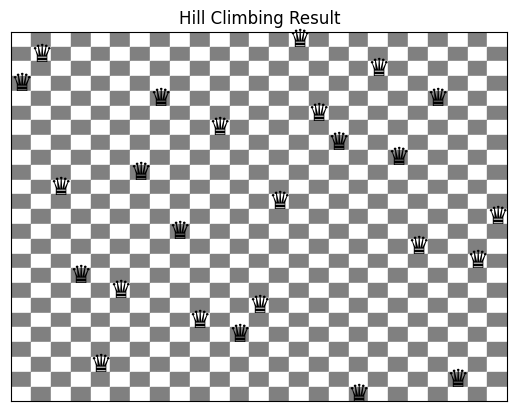

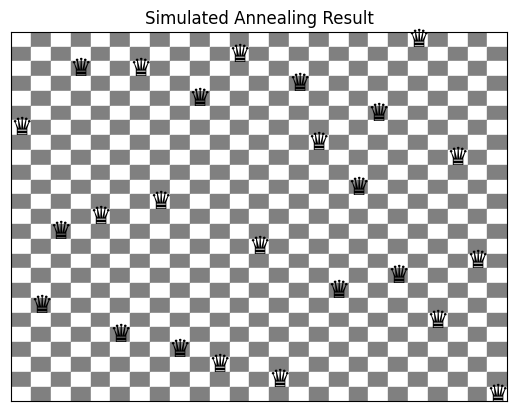

In [ ]:
# N-Queens Optimization with Hill Climbing and Simulated Annealing

import random
import time
import math
import matplotlib.pyplot as plt

def generate_board(n):
    return [random.randint(0, n - 1) for _ in range(n)]

def compute_attacks(board):
    attacks = 0
    n = len(board)
    for i in range(n):
        for j in range(i + 1, n):
            if board[i] == board[j] or abs(board[i] - board[j]) == abs(i - j):
                attacks += 1
    return attacks

def get_neighbors(board):
    neighbors = []
    n = len(board)
    for col in range(n):
        for row in range(n):
            if board[col] != row:
                neighbor = board.copy()
                neighbor[col] = row
                neighbors.append(neighbor)
    return neighbors

def hill_climbing(n, max_iterations=1000):
    board = generate_board(n)
    current_attacks = compute_attacks(board)
    start_time = time.time()
    for _ in range(max_iterations):
        neighbors = get_neighbors(board)
        neighbor_attacks = [compute_attacks(nb) for nb in neighbors]
        min_attacks = min(neighbor_attacks)
        if min_attacks >= current_attacks:
            break
        best_neighbors = [nb for nb, atk in zip(neighbors, neighbor_attacks) if atk == min_attacks]
        board = random.choice(best_neighbors)
        current_attacks = min_attacks
        if current_attacks == 0:
            break
    end_time = time.time()
    return board, current_attacks, end_time - start_time

def simulated_annealing(n, max_iterations=1000, initial_temp=100.0, cooling_rate=0.99):
    board = generate_board(n)
    current_attacks = compute_attacks(board)
    temperature = initial_temp
    start_time = time.time()
    for _ in range(max_iterations):
        if current_attacks == 0:
            break
        neighbor = random.choice(get_neighbors(board))
        neighbor_attacks = compute_attacks(neighbor)
        delta = neighbor_attacks - current_attacks
        if delta < 0 or random.random() < math.exp(-delta / temperature):
            board = neighbor
            current_attacks = neighbor_attacks
        temperature *= cooling_rate
        if temperature < 1e-3:
            break
    end_time = time.time()
    return board, current_attacks, end_time - start_time

def plot_board(board, title):
    n = len(board)
    fig, ax = plt.subplots()
    ax.set_title(title)
    for i in range(n):
        for j in range(n):
            color = 'white' if (i + j) % 2 == 0 else 'gray'
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))
    for col, row in enumerate(board):
        ax.text(col + 0.5, row + 0.5, '♛', ha='center', va='center', fontsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    plt.gca().invert_yaxis()
    plt.show()

# Experiment
n = 25
hc_board, hc_attacks, hc_time = hill_climbing(n)
sa_board, sa_attacks, sa_time = simulated_annealing(n)

# Results
print("Hill Climbing →", hc_board, "| Ataques:", hc_attacks, "| Tiempo:", round(hc_time, 5))
print("Simulated Annealing →", sa_board, "| Ataques:", sa_attacks, "| Tiempo:", round(sa_time, 5))

# Visualization
plot_board(hc_board, "Hill Climbing Result")
plot_board(sa_board, "Simulated Annealing Result")
